# Business understanding

This project aims to develop a machine learning-based Network Intrusion Detection System using the UNSW-NB15 dataset to accurately detect and classify network attacks. By applying Logistic Regression and Random Forest models to both binary and multiclass classification tasks, the system seeks to achieve reliable performance above 80% accuracy while reducing false negatives. The proposed solution provides an automated, data-driven approach to intrusion detection that addresses the limitations of traditional signature-based methods within a defined timeframe.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Configures pandas’ display settings so that all columns are shown and no text in any column is truncated when a DataFrame is printed,
# making the full content of each cell visible during inspection or debugging.
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

# Importing Data

## Context

The raw network packets of the UNSW-NB 15 data set is created by the IXIA PerfectStorm tool in the Cyber Range Lab, UNSW Canberra for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. Tcpdump tool is utilised to capture the raw traffic (e.g., Pcap files).

This data set has nine families of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are utilised and twelve algorithms are developed to generate totally 44 features with the class label. These features are described in UNSW-NB15_freatures.csv file.

A partition of the original data set is configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set respectively. The number of records in the training set is 175,341 records and the testing set is 82,332 records from different the types of attack and normal.

The structure of this dataset is more complex in comparison with the other benchmark datasets such as DARPA98 (LABORATORY, 1998), KDDCUP 99 (Janarthanan & Zargari, 2017; Moustafa & Slay, 2016), and NSL-KDD (Tavallaee, Bagheri, Lu, & Ghorbani, 2009) among others. This makes the UNSW-NB15 more comprehensive for evaluating the existing network intrusion detection systems in a more reliable way (Moustafa & Slay, 2016).

## Importing the training and testing data as df_train and df_test respectively:

In [3]:
df_train = pd.read_csv("./datasets/UNSW_NB15_training-set.csv", index_col=0)
df_test = pd.read_csv("./datasets/UNSW_NB15_testing-set.csv", index_col=0)

## Viewing the first 5 records of training dataset:

In [4]:
df_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


## Details of training dataset (No. of rows & columns and value count of label & attack category):

In [5]:
# Check dataset scale: 175k rows (traffic logs) and 45 features (attributes).
train_shape = df_train.shape
test_shape = df_test.shape

print("Training dataset:\n---------------------------------------------------------")
print(f"{train_shape[0]} rows and {train_shape[1]} columns\n")

# Target Distribution: Assessing balance between Normal (0) and Attack (1).
# Note: Dataset is 'attack-heavy' (68%), providing ample malicious signatures.
print("Distribution of Normal vs Attack traffic:")
print(df_train['label'].value_counts())

print()

# Attack Categories: Identifying specific threats (e.g., Exploits, DoS).
# Helps identify rare classes (Worms) that might be harder to detect.
print("Breakdown of specific Attack Categories:")
print(df_train['attack_cat'].value_counts())

Training dataset:
---------------------------------------------------------
175341 rows and 44 columns

Distribution of Normal vs Attack traffic:
label
1    119341
0     56000
Name: count, dtype: int64

Breakdown of specific Attack Categories:
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


## Details of testing dataset (No. of rows & columns and value count of label & attack category):

In [6]:
print("Test dataset:\n------------------------------------------------------------------------------------")
print(f"{test_shape[0]} rows and {test_shape[1]} columns\n")

print(df_test['label'].value_counts())       # benign vs attack distribution
print()
print(df_test['attack_cat'].value_counts())  # per-attack distribution

Test dataset:
------------------------------------------------------------------------------------
82332 rows and 44 columns

label
1    45332
0    37000
Name: count, dtype: int64

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


## Importing information of features as df_feature:

In [7]:
df_feature = pd.read_csv("./datasets/UNSW-NB15_features.csv", index_col=0)

### Headers

A total of 44 features including packet-based and flow-based features were extracted from the raw network packets by Argus and Bro-IDS tools. Packet-based features are extracted from the packet header and its payload (also called packet data) while flow-based features are generated using the sequencing of packets, from a source to a destination, traveling in the network.

The first 42 features are the non-target features which are categorised into 5 groups: Flow, Basic, Content, Time, and Additional.

Flow features: proto

Basic features: state, dur, sbytes, dbytes, rate, sttl, dttl, sloss, dloss, service, sload, dload, spkts, dpkts

Content features: swin, dwin, stcpb, dtcpb, smean, dmean, trans_depth, response_body_len

Time features: sjit, djit, sinpkt, dinpkt, tcprtt, synack, ackdat

Additional features:
  
- General purpose features: is_sm_ips_ports, ct_state_ttl, ct_flw_http_mthd, is_ftp_login, ct_ftp_cmd
  
- Connection features: ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_src_sport_ltm, ct_dst_src_ltm

The last two features are the target features which include attack categories and labels. Attacks are categorized as Analysis, Backdoor, DoS, Exploits, Fuzzers, Generic, Reconnaissance, Shellcode and Worms. The labels 0 and 1 represent normal and attack records respectively.

In [8]:
df_feature

,Name,Type,Description
No,,,
1,proto,nominal,Transaction protocol
2,state,nominal,"Indicates the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) if not used"
3,dur,float,Record total duration
4,sbytes,integer,Source to destination transaction bytes
5,dbytes,integer,Destination to source transaction bytes
6,rate,float,Ethernet data rates transmitted and received
7,sttl,integer,Source to destination time to live value
8,dttl,integer,Destination to source time to live value
9,sloss,integer,Source packets retransmitted or dropped


# EDA (Pre Data Cleaning)

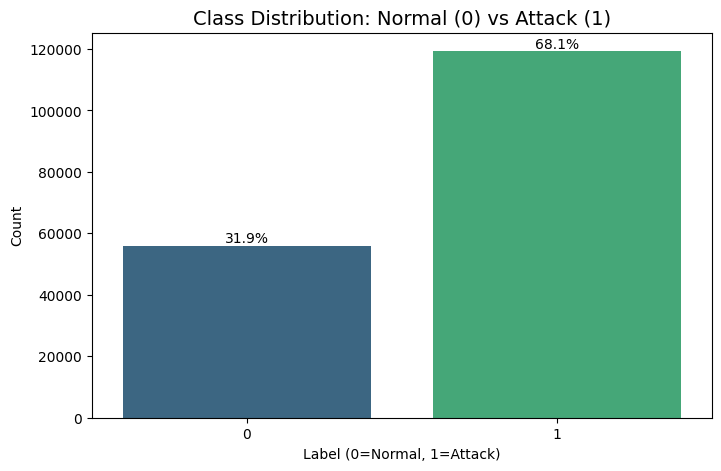

In [10]:
# Create canvas size for visibility during presentation
plt.figure(figsize=(8, 5))

# Plot counts: 'label' shows if traffic is Normal (0) or Attack (1)
ax = sns.countplot(data=df_train, x="label", hue="label", palette="viridis", legend=False)

plt.title("Class Distribution: Normal (0) vs Attack (1)", fontsize=14)
plt.xlabel("Label (0=Normal, 1=Attack)")
plt.ylabel("Count")

# CALCULATING PERCENTAGES:
# This part adds labels on top of bars to show relative frequency (e.g., 68% vs 32%)
# Essential for highlighting the class imbalance to the audience.
total = len(df_train)
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Generic'),
  Text(2, 0, 'Exploits'),
  Text(3, 0, 'Fuzzers'),
  Text(4, 0, 'DoS'),
  Text(5, 0, 'Reconnaissance'),
  Text(6, 0, 'Analysis'),
  Text(7, 0, 'Backdoor'),
  Text(8, 0, 'Shellcode'),
  Text(9, 0, 'Worms')])

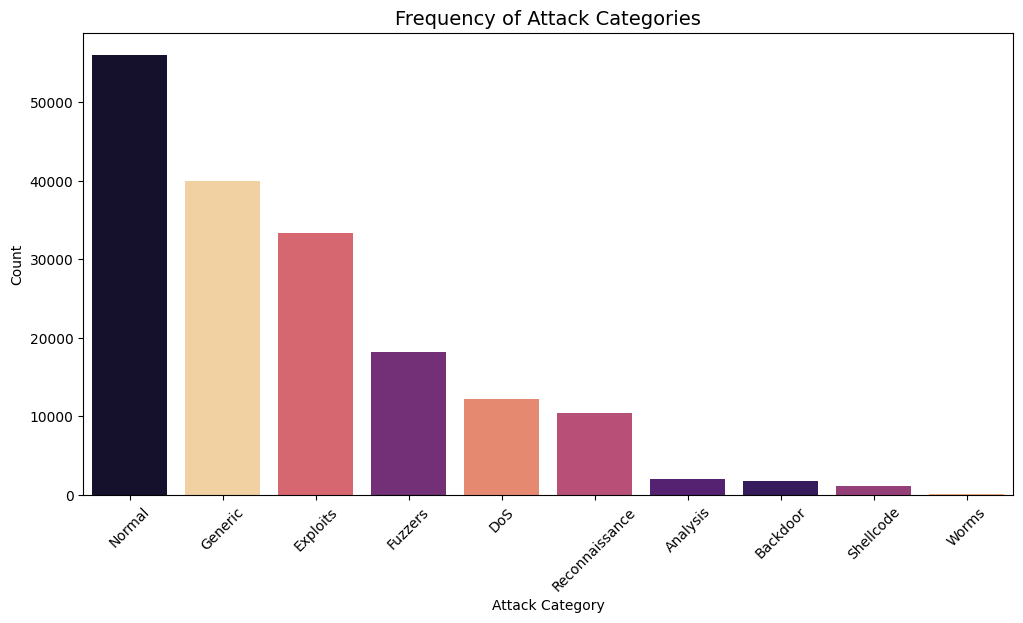

In [11]:
# Set figure size for clear visibility in the presentation slides.
plt.figure(figsize=(12, 6))

# Order categories by frequency (highest to lowest) to show the 'Long Tail' distribution.
order = df_train['attack_cat'].value_counts().index
sns.countplot(data=df_train, x='attack_cat', hue='attack_cat', order=order, palette="magma", legend=False)

# Labels and Title for readability.
plt.title("Frequency of Attack Categories", fontsize=14)
plt.xlabel("Attack Category")
plt.ylabel("Count")

# Rotate labels 45 degrees so category names (e.g., 'Backdoor') don't overlap.
plt.xticks(rotation=45)


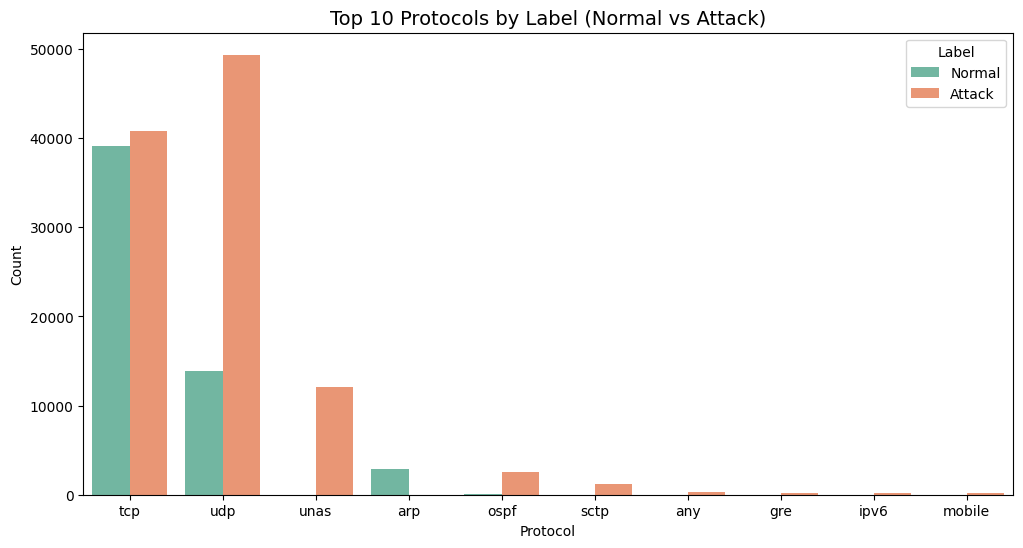

In [12]:
# Select top 10 most frequent protocols to avoid cluttering the chart.
top10_proto = df_train['proto'].value_counts().head(10).index

plt.figure(figsize=(12, 6))

# Compare Normal vs Attack traffic counts within these top protocols.
sns.countplot(data=df_train[df_train['proto'].isin(top10_proto)],
              x='proto', hue='label', order=top10_proto, palette="Set2")

plt.title("Top 10 Protocols by Label (Normal vs Attack)", fontsize=14)
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.legend(title='Label', loc='upper right', labels=['Normal', 'Attack'])

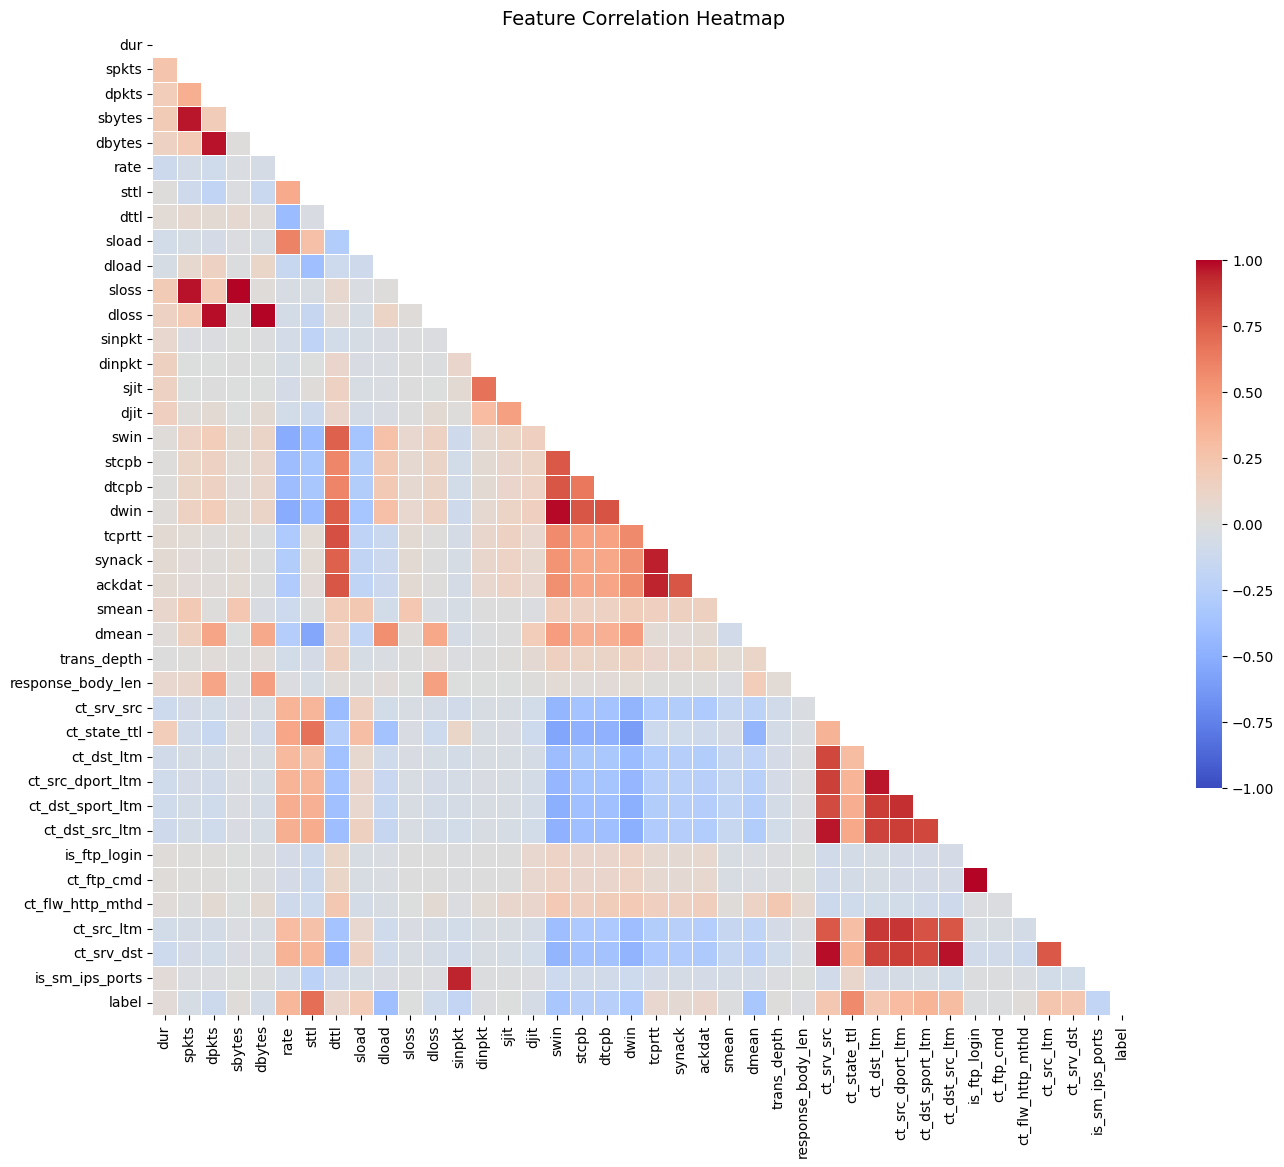

In [13]:
# Select only numerical columns for correlation math.
numeric_cols = df_train.select_dtypes(include=np.number).columns
corr = df_train[numeric_cols].corr()

# Apply a 'mask' to hide the top half of the heatmap.
# This removes duplicate info and makes the chart much easier for an audience to read.
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12))

# Plot heatmap: Red = High Correlation, Blue = Low Correlation.
# Square=True and linewidths make the grid look clean and professional.
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()

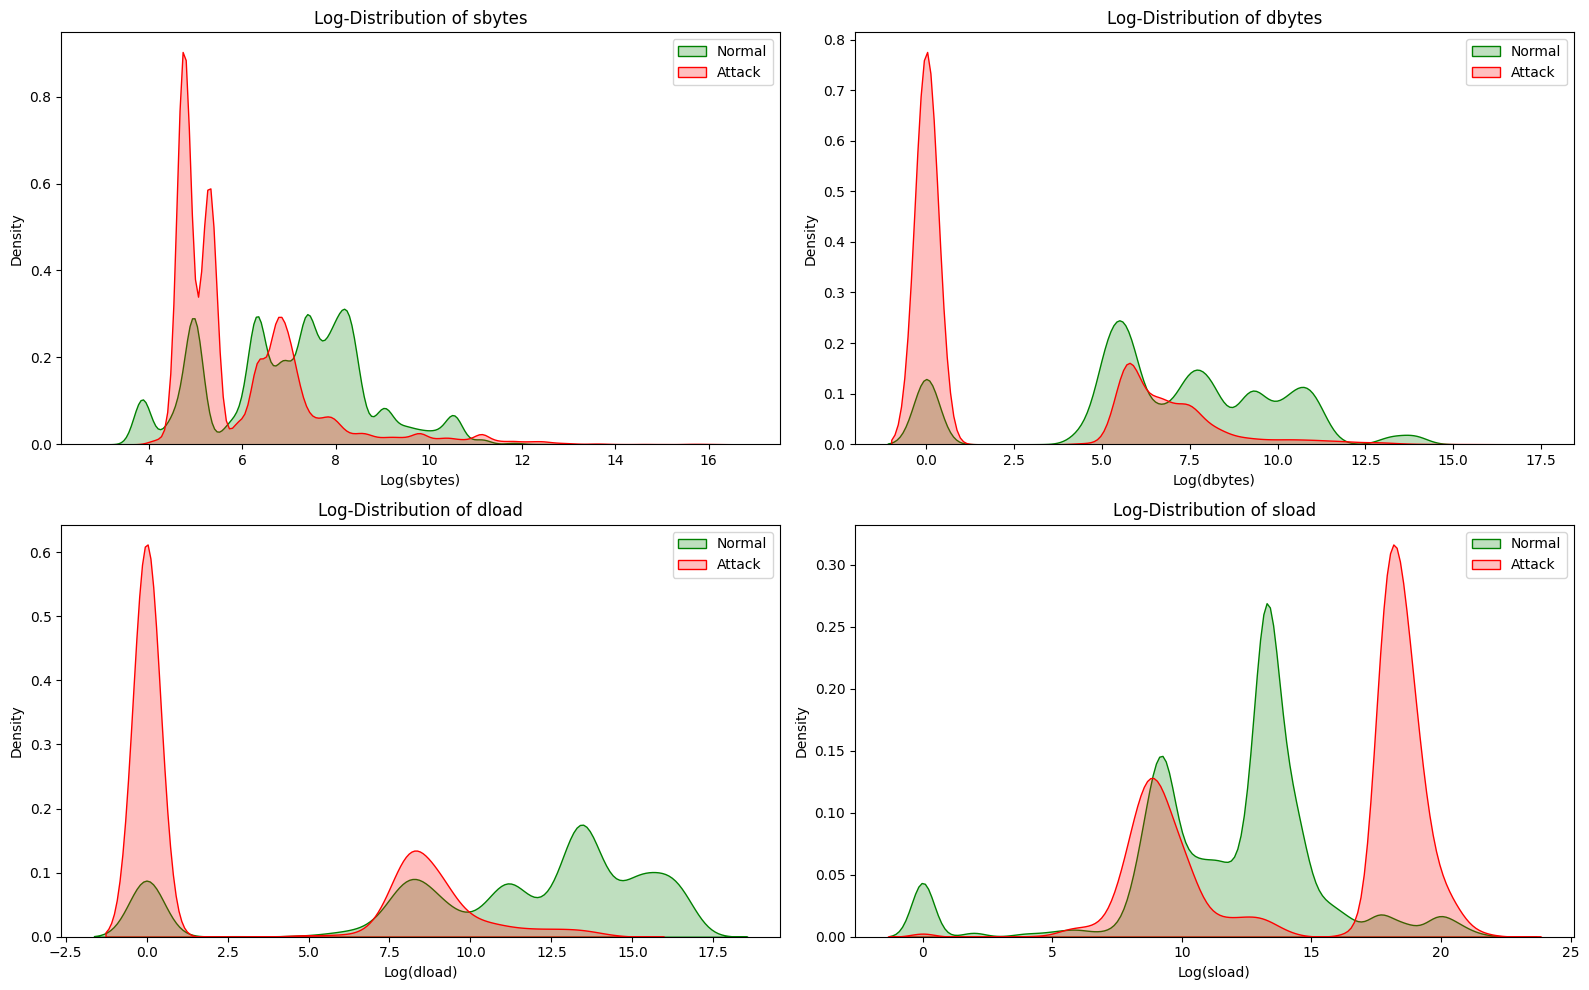

In [14]:
# List of critical network metrics to visualize
cols_to_plot = ['sbytes', 'dbytes', 'dload', 'sload']

# Create a 2x2 grid for side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    # np.log1p: Normalizes 'bursty' network data so we can see patterns clearly.
    # We compare Normal (Green) vs Attack (Red) distributions.
    sns.kdeplot(np.log1p(df_train.loc[df_train['label']==0, col]), ax=axes[i], label='Normal', fill=True, color='green')
    sns.kdeplot(np.log1p(df_train.loc[df_train['label']==1, col]), ax=axes[i], label='Attack', fill=True, color='red')

    axes[i].set_title(f"Log-Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(f"Log({col})")
    axes[i].legend()

plt.tight_layout()

# Data cleaning

## Cleaning missing values

In [16]:
print(f"No. of NA values:\nTraning dataset - {df_train.isna().any().sum()}\nTest dataset - {df_test.isna().any().sum()}")

No. of NA values:
Traning dataset - 0
Test dataset - 0


There are no missing values in the dataset.

## Cleaning duplicated rows in training dataset

In [17]:
df_train.duplicated().sum()

np.int64(67601)

## Cleaning duplicated rows in testing dataset

In [18]:
df_test.duplicated().sum()

np.int64(26387)

Dropping duplicated rows is a data-quality control step used to ensure that each observation represents a unique and independent record.

If duplicates are left in a dataset:

- They bias statistical results by giving certain records more weight than others.

- They can mislead machine-learning models, causing the model to overfit patterns that appear more frequently only because they were duplicated.

- They distort metrics such as averages, class distributions, and prediction accuracy.

By removing duplicates, the dataset accurately reflects the real-world population being modeled, leading to more reliable analysis, fairer training data, and more trustworthy model performance.

### Original shape of the datasets

In [19]:
df_train.shape, df_test.shape

((175341, 44), (82332, 44))

In [20]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

### Shape of the datasets after duplicated values have been removed

In [21]:
df_train.shape, df_test.shape

((107740, 44), (55945, 44))

## Categorical values check

### Frequency analysis

In [22]:
df_train['proto'].value_counts()

,count
proto,
tcp,76293
udp,23027
unas,2582
ospf,775
arp,633
...,...
tlsp,26
ggp,24
igmp,17


In [24]:
df_train['state'].value_counts()

,count
state,
FIN,74478
INT,19726
CON,12487
REQ,953
RST,83
ECO,10
PAR,1
URN,1
no,1


In [26]:
df_train['service'].value_counts()

,count
service,
-,64951
http,18135
dns,11046
smtp,5025
ftp-data,3282
ftp,2691
ssh,1295
pop3,1104
snmp,63


In [33]:
df_train['attack_cat'].value_counts()

,count
attack_cat,
Normal,51890
Exploits,19844
Fuzzers,16150
Reconnaissance,7522
Generic,4181
DoS,3806
Analysis,1594
Backdoor,1535
Shellcode,1091


### Visual Validation

<Axes: xlabel='proto'>

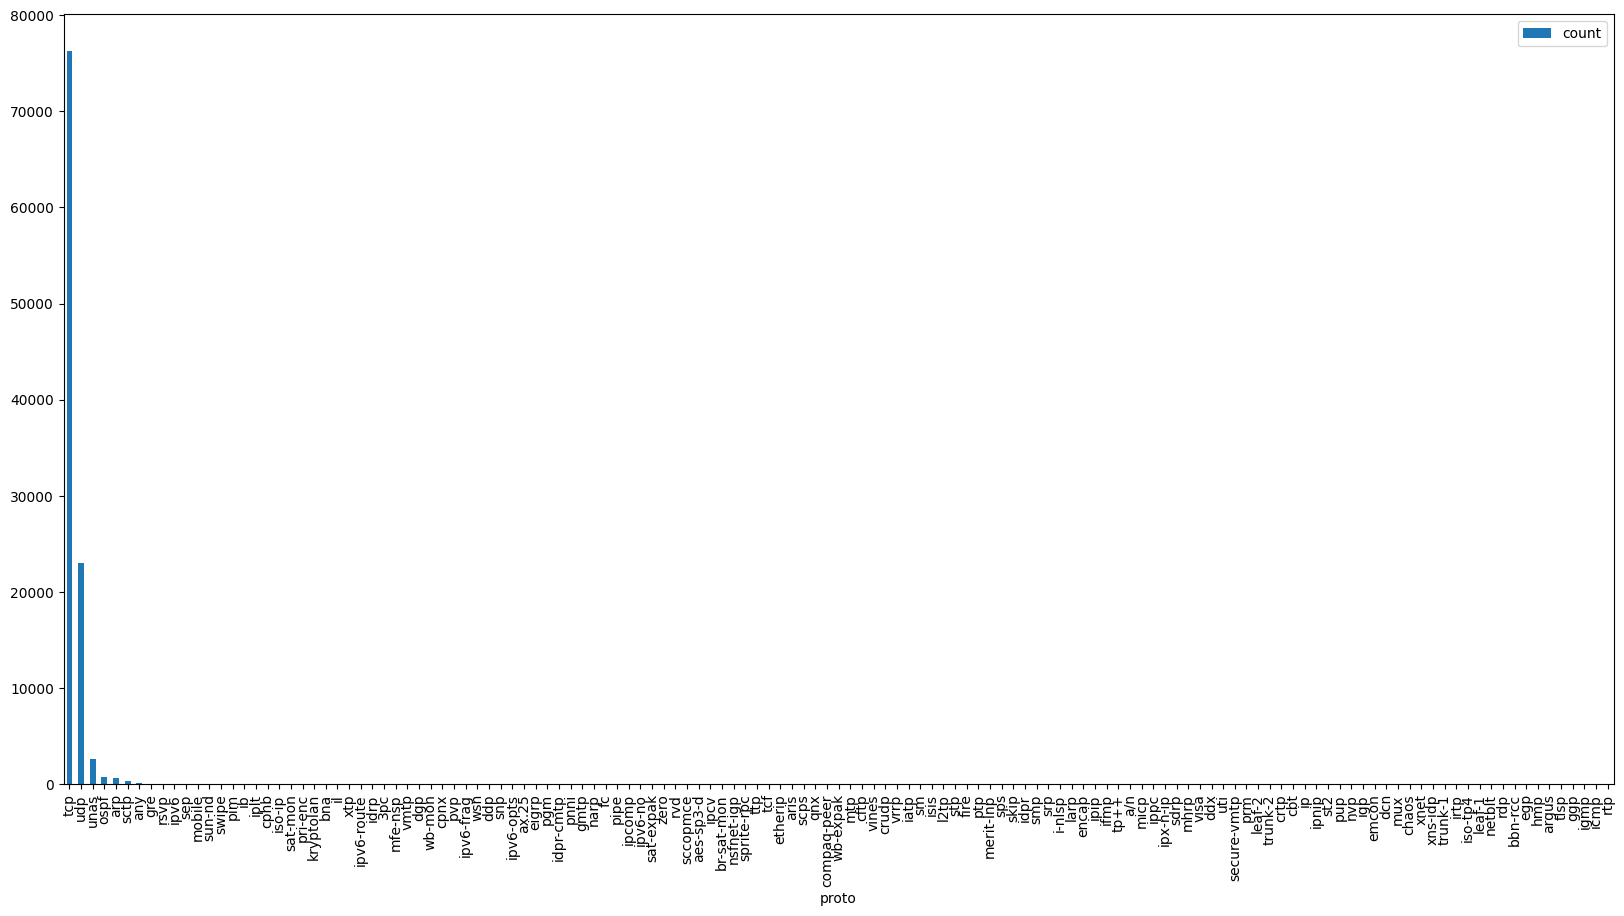

In [23]:
pd.DataFrame(df_train['proto'].value_counts()).plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='state'>

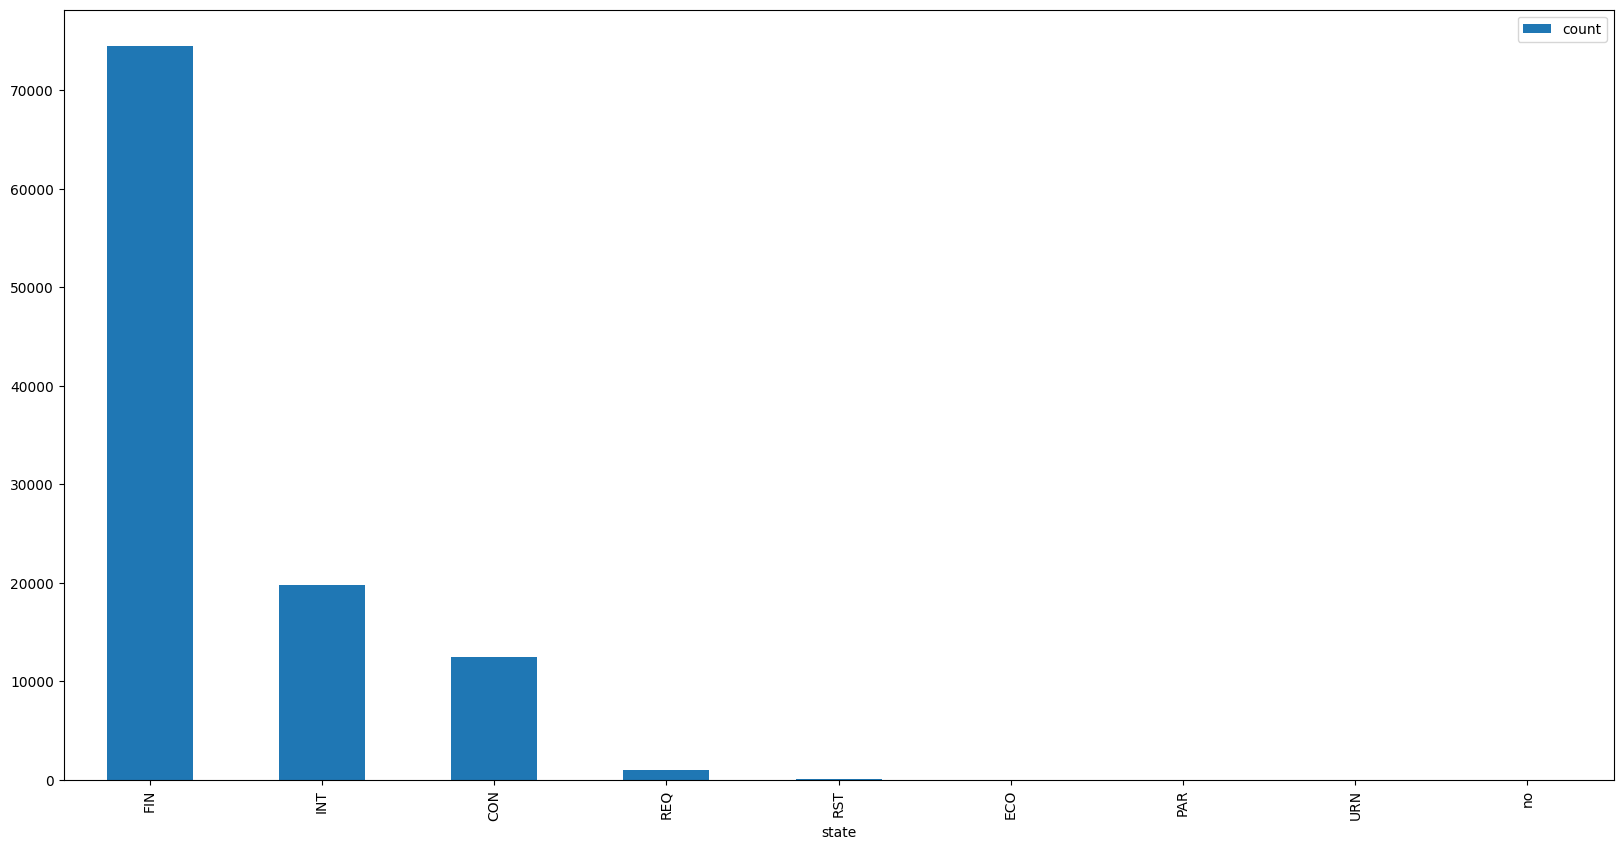

In [25]:
pd.DataFrame(df_train['state'].value_counts()).plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='service'>

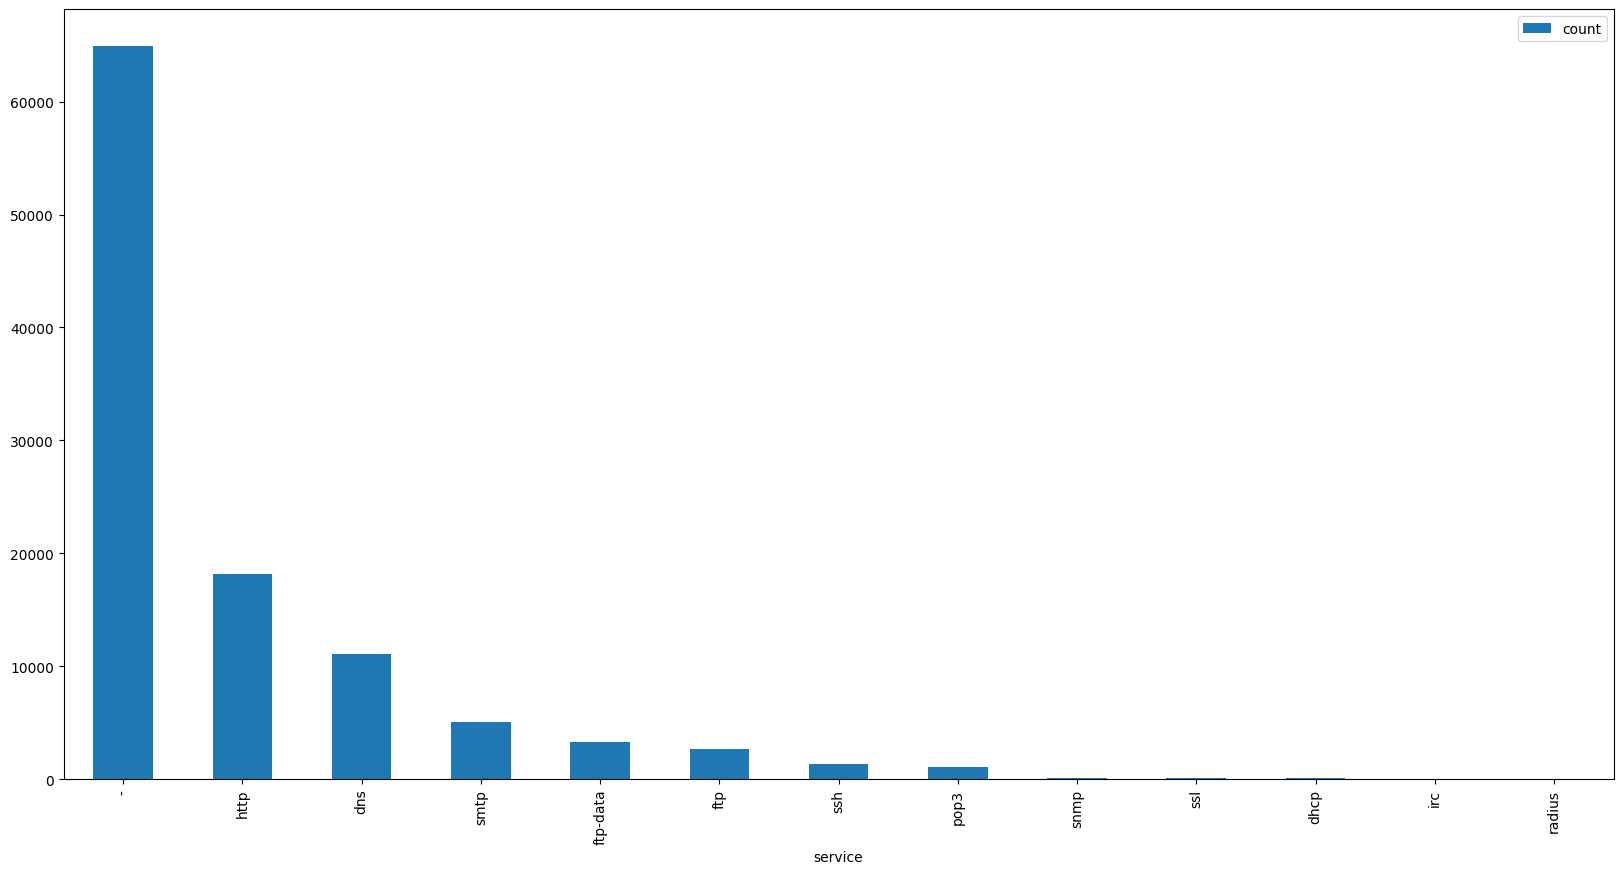

In [27]:
pd.DataFrame(df_train['service'].value_counts()).plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='attack_cat'>

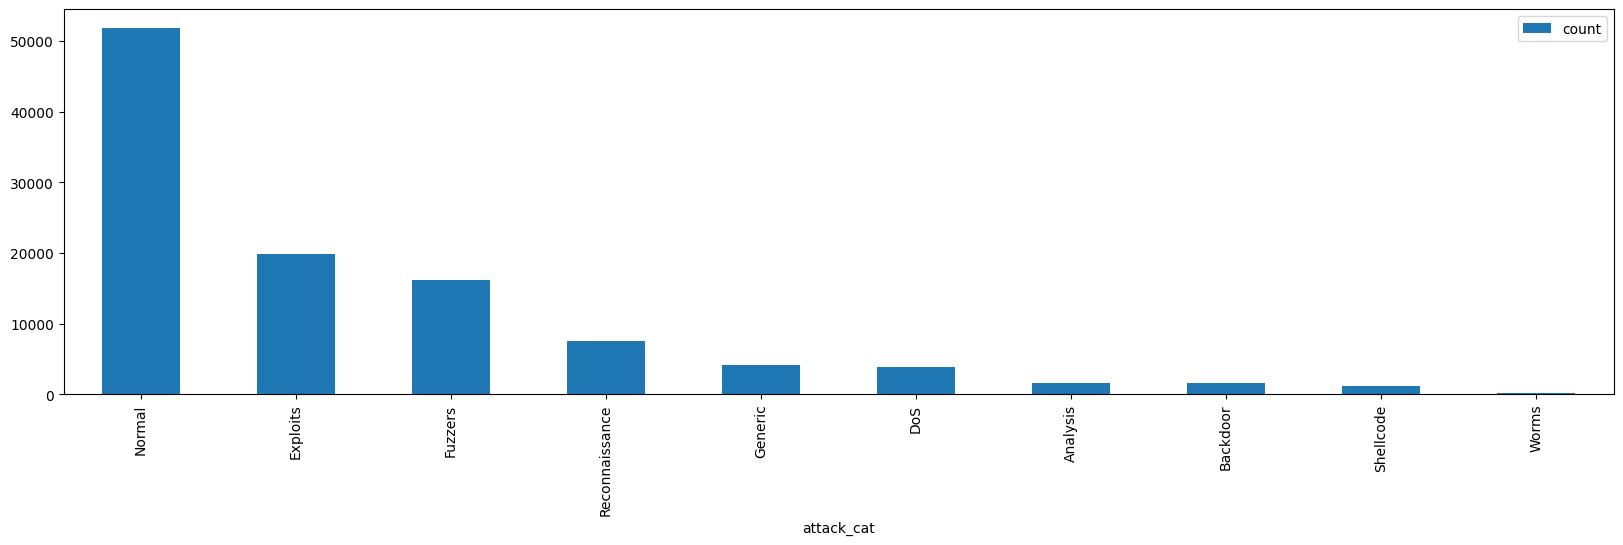

In [34]:
pd.DataFrame(df_train['attack_cat'].value_counts()).plot(kind='bar', figsize=(20, 5))

### Standardising Non-Semantic Placeholder Values

In [28]:
df_train.replace({'state': 'no'}, 'Not Applicable', inplace=True)
df_train['state'].value_counts()

,count
state,
FIN,74478
INT,19726
CON,12487
REQ,953
RST,83
ECO,10
PAR,1
URN,1
Not Applicable,1


In [29]:
df_train.replace({'service': '-'}, 'Not Applicable', inplace=True)
df_train['service'].value_counts()

,count
service,
Not Applicable,64951
http,18135
dns,11046
smtp,5025
ftp-data,3282
ftp,2691
ssh,1295
pop3,1104
snmp,63


### Defining & Merging Rare Classes

In [37]:
# Define rare attack categories
rare_classes = [
    'Worms',
    'Shellcode',
    'Backdoor',
    'Analysis'
]

# Merge rare classes
df_train['attack_cat_merged'] = df_train['attack_cat'].apply(
    lambda x: 'Rare_Attack' if x in rare_classes else x
)

df_test['attack_cat_merged'] = df_test['attack_cat'].apply(
    lambda x: 'Rare_Attack' if x in rare_classes else x
)

In [39]:
df_train['attack_cat_merged'].value_counts()

,count
attack_cat_merged,
Normal,51890
Exploits,19844
Fuzzers,16150
Reconnaissance,7522
Rare_Attack,4347
Generic,4181
DoS,3806


<Axes: xlabel='attack_cat_merged'>

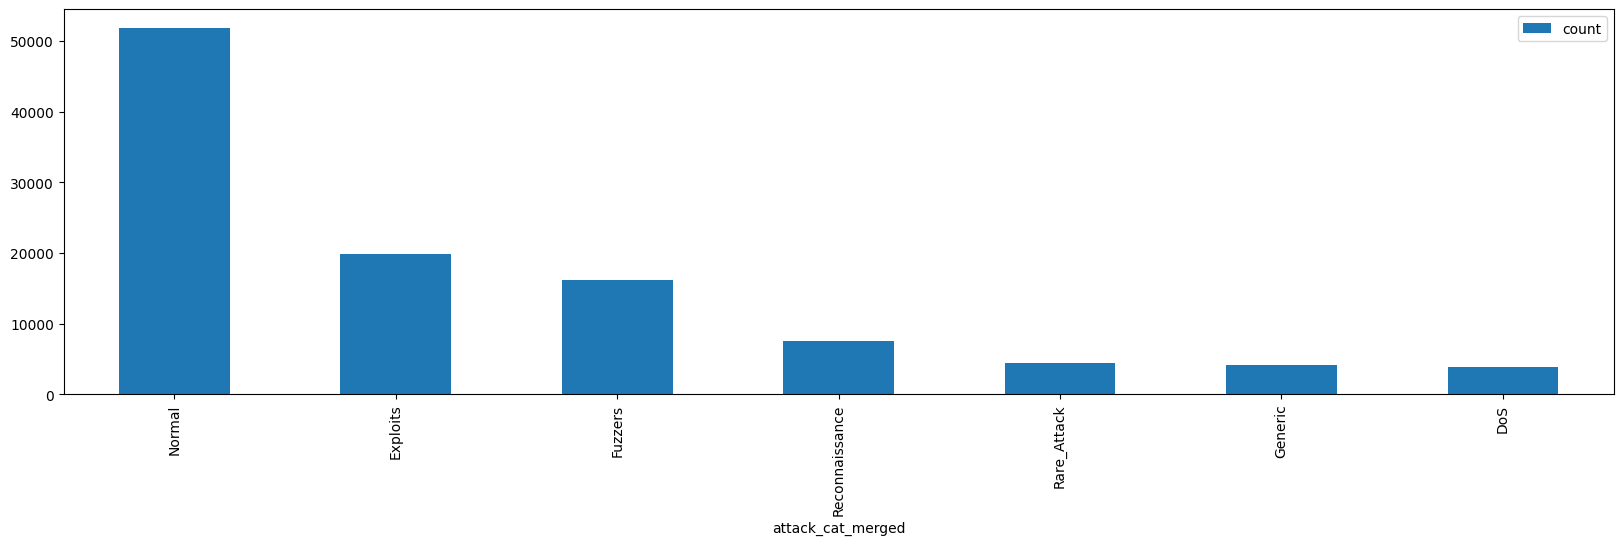

In [40]:
pd.DataFrame(df_train['attack_cat_merged'].value_counts()).plot(kind='bar', figsize=(20, 5))

In [38]:
df_train.drop('attack_cat', axis=1, inplace=True)
df_test.drop('attack_cat', axis=1, inplace=True)

### Cleaning test dataset

In [30]:
df_test['state'].value_counts()

,count
state,
FIN,37355
INT,10646
CON,6711
REQ,1227
ACC,4
RST,1
CLO,1


In [31]:
df_test['service'].value_counts()

,count
service,
-,37027
http,7930
dns,6091
smtp,1759
ftp,1291
ftp-data,1177
pop3,381
ssh,204
ssl,30


In [32]:
df_test.replace({'service': '-'}, 'Not Applicable', inplace=True)
df_test['service'].value_counts()

,count
service,
Not Applicable,37027
http,7930
dns,6091
smtp,1759
ftp,1291
ftp-data,1177
pop3,381
ssh,204
ssl,30


In [35]:
df_test['attack_cat_merged'].value_counts()

,count
attack_cat,
Normal,34206
Exploits,7609
Fuzzers,4838
Generic,3657
Reconnaissance,2703
DoS,1718
Analysis,446
Shellcode,378
Backdoor,346


<Axes: xlabel='attack_cat'>

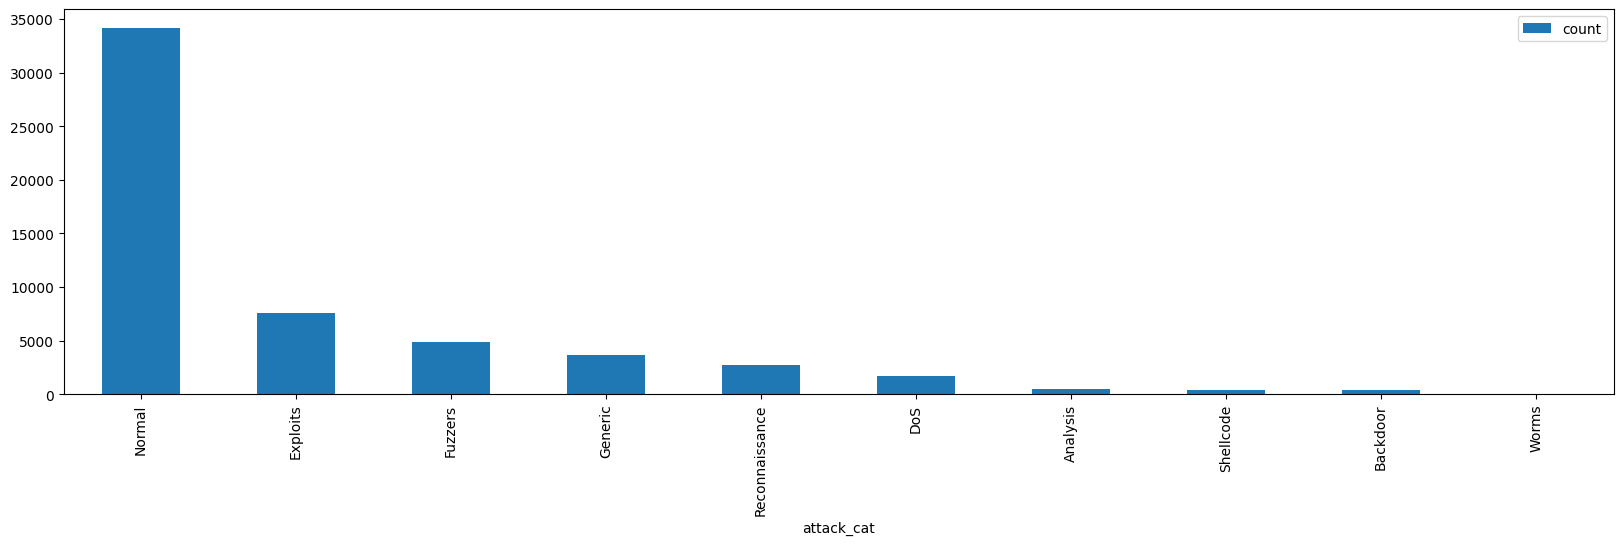

In [36]:
pd.DataFrame(df_test['attack_cat_merged'].value_counts()).plot(kind='bar', figsize=(20, 5))

## Checking distribution of binary columns

The binary column names start with 'is_', so these columns are filtered with the following code:

In [41]:
df_train.filter(like='is_').value_counts()

,,count
is_ftp_login,is_sm_ips_ports,
0,0,105349
1,0,1837
0,1,545
4,0,5
2,0,4


Binary columns should only contain values 0 and 1, but the is_ftp_login column contains the values 2 and 4. These are removed as follows:

In [42]:
df_train.drop(df_train[df_train.is_ftp_login > 1].index, inplace=True)
df_train['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,105894
1,1837


The same is done for the test dataset

In [43]:
df_test.filter(like='is_').value_counts()

,,count
is_ftp_login,is_sm_ips_ports,
0,0,55151
1,0,525
0,1,268
2,0,1


In [44]:
df_test.drop(df_test[df_test.is_ftp_login > 1].index, inplace=True)
df_test['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,55419
1,525


# EDA (Post Data Cleaning)


The class distribution now indicates a near-balanced dataset, with only a minor skew toward attack traffic, which is ideal for supervised learning.
Models trained on this data are less likely to develop class bias toward either Normal or Attack traffic.

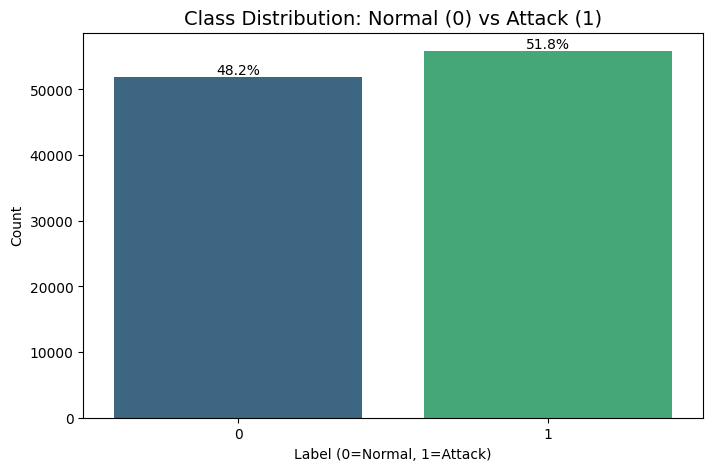

In [46]:
# Create canvas size for visibility during presentation
plt.figure(figsize=(8, 5))

# Plot counts: 'label' shows if traffic is Normal (0) or Attack (1)
ax = sns.countplot(data=df_train, x="label", hue="label", palette="viridis", legend=False)

plt.title("Class Distribution: Normal (0) vs Attack (1)", fontsize=14)
plt.xlabel("Label (0=Normal, 1=Attack)")
plt.ylabel("Count")

# CALCULATING PERCENTAGES:
# This part adds labels on top of bars to show relative frequency
# Essential for highlighting the class imbalance to the audience.
total = len(df_train)
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

The post-cleaning visualization shows a deliberate and justified restructuring of the label space, where rare attack types are no longer isolated noise points and the class distribution is statistically healthier.

The data cleaning step directly improves model validity, not just convenience. It trades unnecessary granularity for learnability and robustness, which is the correct decision in applied intrusion detection tasks.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Exploits'),
  Text(2, 0, 'Fuzzers'),
  Text(3, 0, 'Reconnaissance'),
  Text(4, 0, 'Rare_Attack'),
  Text(5, 0, 'Generic'),
  Text(6, 0, 'DoS')])

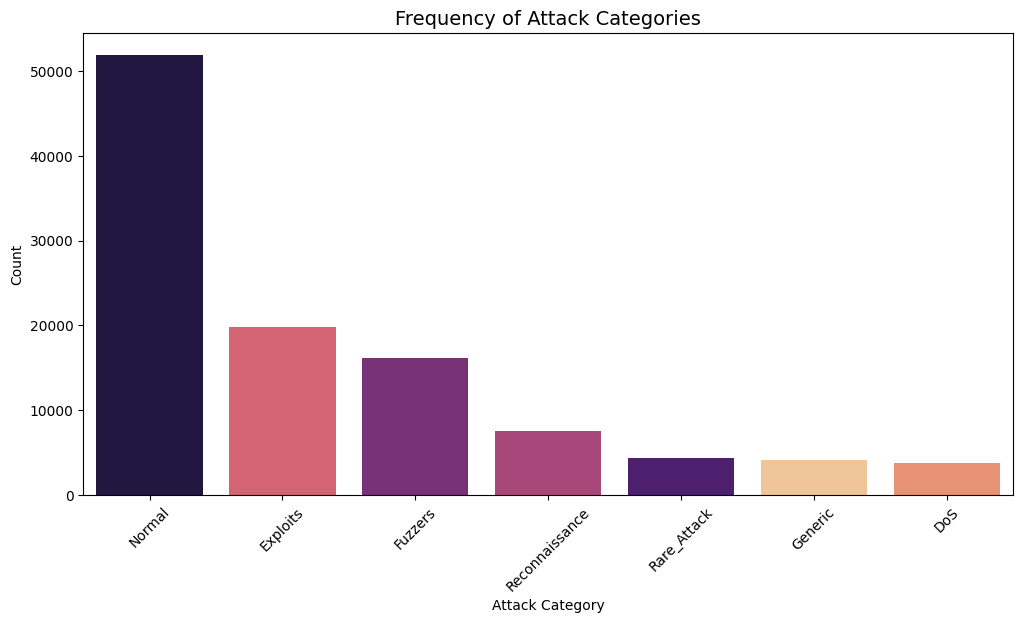

In [47]:
# Set figure size for clear visibility in the presentation slides.
plt.figure(figsize=(12, 6))

# Order categories by frequency (highest to lowest) to show the 'Long Tail' distribution.
order = df_train['attack_cat_merged'].value_counts().index
sns.countplot(data=df_train, x='attack_cat_merged', hue='attack_cat_merged', order=order, palette="magma", legend=False)

# Labels and Title for readability.
plt.title("Frequency of Attack Categories", fontsize=14)
plt.xlabel("Attack Category")
plt.ylabel("Count")

# Rotate labels 45 degrees so category names don't overlap.
plt.xticks(rotation=45)

The post-cleaning visualization of the top 10 protocols demonstrates a critical improvement in feature integrity. Protocol is no longer a shortcut label, distribution reflects real network behaviour and rare protocols carry semantic meaning, not noise.

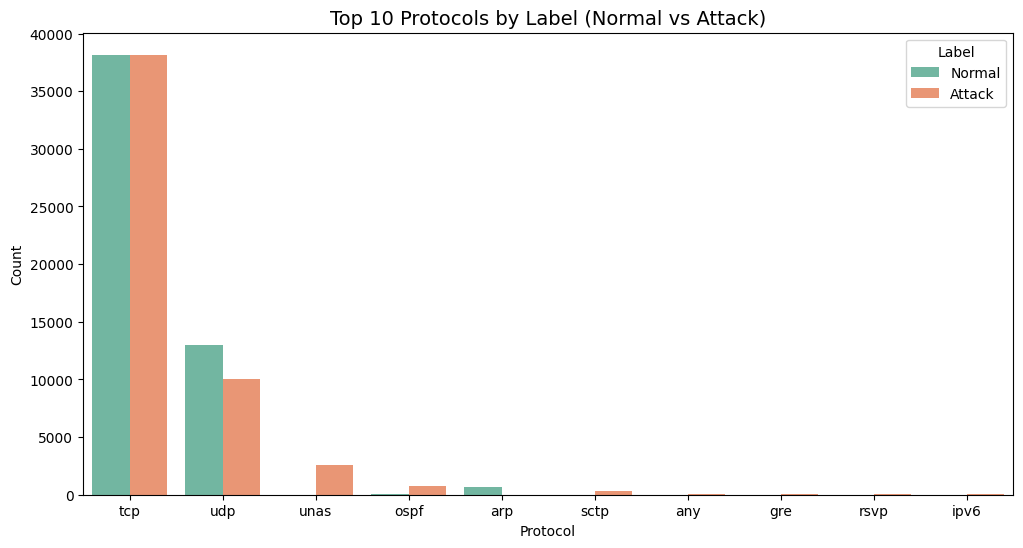

In [48]:
# Select top 10 most frequent protocols to avoid cluttering the chart.
top10_proto = df_train['proto'].value_counts().head(10).index

plt.figure(figsize=(12, 6))

# Compare Normal vs Attack traffic counts within these top protocols.
sns.countplot(data=df_train[df_train['proto'].isin(top10_proto)],
              x='proto', hue='label', order=top10_proto, palette="Set2")

plt.title("Top 10 Protocols by Label (Normal vs Attack)", fontsize=14)
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.legend(title='Label', loc='upper right', labels=['Normal', 'Attack'])

The post-cleaning correlation heatmap confirms that the data cleaning was structural. Relationships between features now reflect network behaviour, not data artifacts. Also, no single feature dominates prediction. Correlated features form logical groups, which is often desirable.

From an EDA standpoint, this justifies using correlation-based feature selection carefully and applying scaling rather than aggressive feature dropping.


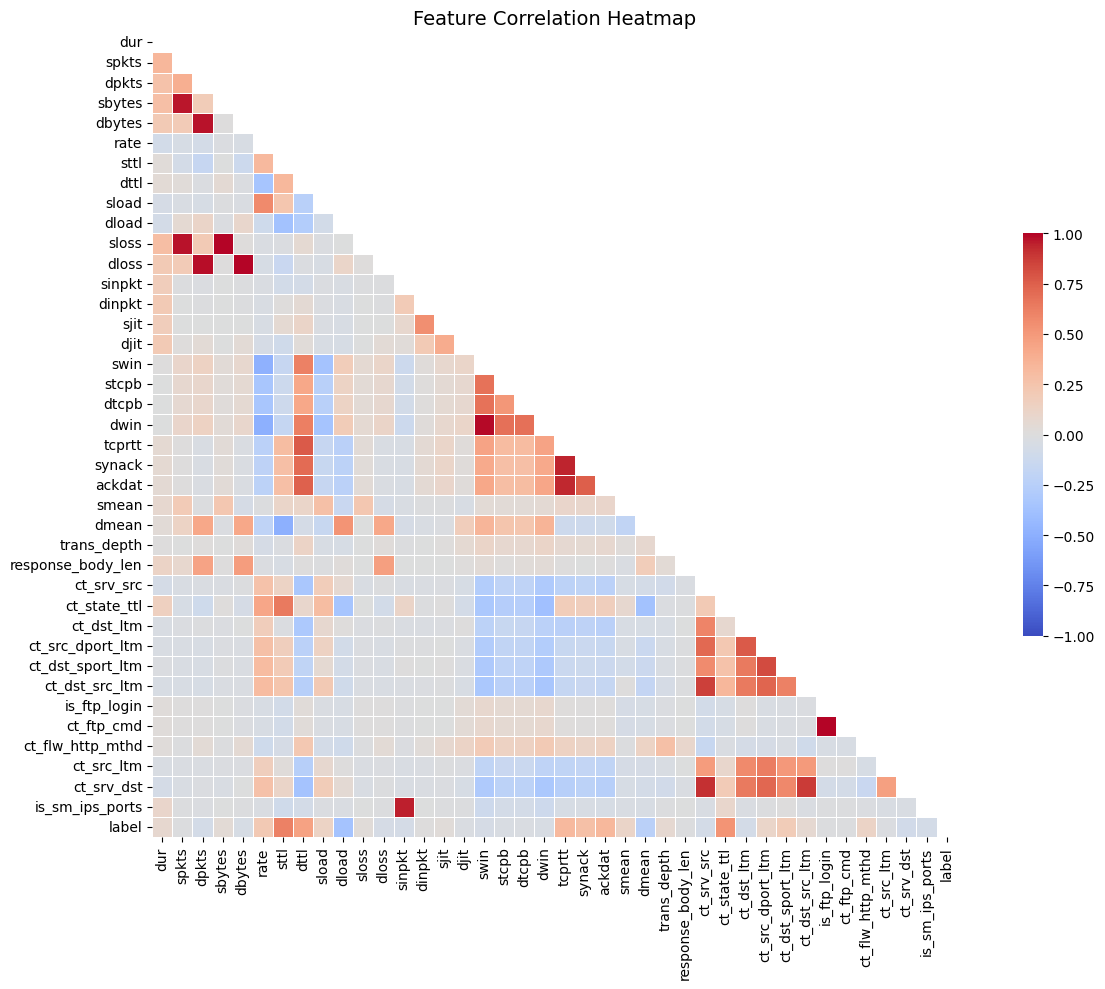

In [52]:
# Select only numerical columns for correlation math.
numeric_cols = df_train.select_dtypes(include=np.number).columns
corr = df_train[numeric_cols].corr()

# Apply a 'mask' to hide the top half of the heatmap.
# This removes duplicate info and makes the chart much easier for an audience to read.
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))

# Plot heatmap: Red = High Correlation, Blue = Low Correlation.
# Square=True and linewidths make the grid look clean and professional.
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()

For sbytes, normal traffic shows a broader, multi-modal distribution, centred at moderately higher values. On the other hand, attack traffic is more concentrated at lower to mid log values, with fewer high-volume tails. This means that attacks often generate many small or moderately sized requests rather than sustained large payloads.

For dbytes, clear separation between normal and attack distributions is shown. Normal traffic exhibits wider spread and higher log-byte values, while attack traffic clusters tightly at lower values. This aligns with network scanning, failed exploitation, or short-lived attack connections.

For dload, normal traffic peaks at higher log(dload) values. Attack traffic shows a strong peak near very low values and smaller secondary peaks. This indicates legitimate services sustain throughout, while attacks generate bursty or incomplete responses.

For sload, there is the strongest class separation among the four features. Attack traffic exhibits a distinct high-load peak, while normal traffic is concentrated at lower, stable values. This is characteristic of flooding behaviour and aggressive probing from attacker hosts.

The post-cleaning log-distributions confirm that data cleaning fundamentally improved feature quality. Traffic volume features now reflect real network behaviour. The differences between Normal and Attack traffic are subtle, consistent, and learnable. No single feature trivially separates classes, leading to a good generalisation.

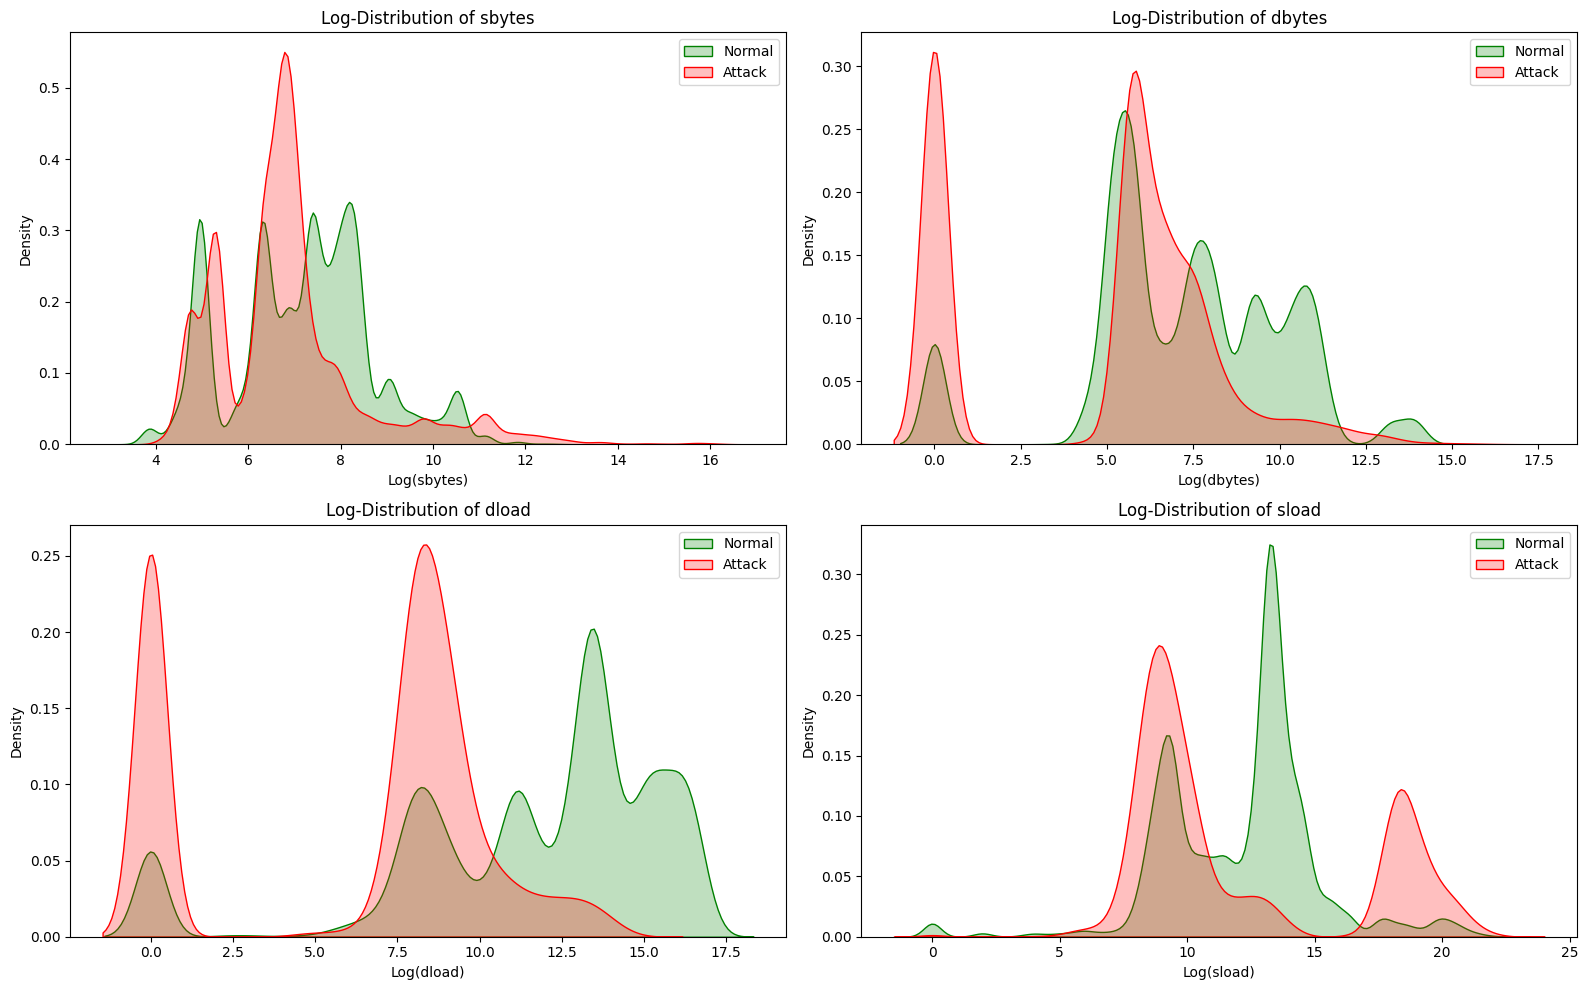

In [50]:
# List of critical network metrics to visualize
cols_to_plot = ['sbytes', 'dbytes', 'dload', 'sload']

# Create a 2x2 grid for side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    # np.log1p: Normalizes 'bursty' network data so we can see patterns clearly.
    # We compare Normal (Green) vs Attack (Red) distributions.
    sns.kdeplot(np.log1p(df_train.loc[df_train['label']==0, col]), ax=axes[i], label='Normal', fill=True, color='green')
    sns.kdeplot(np.log1p(df_train.loc[df_train['label']==1, col]), ax=axes[i], label='Attack', fill=True, color='red')

    axes[i].set_title(f"Log-Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(f"Log({col})")
    axes[i].legend()

plt.tight_layout()

# Feature Engineering

### One-hot encoding nominal non-target features (proto, state, and service)

Among the 42 non-target features, three of them are nominal. We convert the nominal features to numerical as most of the machine learning models and scalers can readily work with the numerical values.

One-hot encoding converts the nominal type columns (proto, state, and service) into numerical dummy variables for both the training and test datasets, then appends the encoded columns back to each DataFrame while removing the original categorical columns.

In [ ]:
df_train = pd.get_dummies(df_train, columns=["proto", "state", "service"])
df_test = pd.get_dummies(df_test, columns=["proto", "state", "service"])

In [ ]:
df_train.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat_merged,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_Not Applicable,state_PAR,state_REQ,state_RST,state_URN,service_Not Applicable,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

### Label encoding categorical target feature

A LabelEncoder is used to convert the categorical values in the attack_cat column into integer labels so that each attack category is represented numerically for machine-learning processing.

In [ ]:
df_train["attack_cat_merged"].unique()

array(['Normal', 'Rare_Attack', 'Fuzzers', 'Reconnaissance', 'Exploits',
       'DoS', 'Generic'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df_train["attack_cat_merged"] = label_encoder.fit_transform(df_train["attack_cat_merged"])

In [ ]:
df_train["attack_cat_merged"].unique()

array([4, 5, 2, 6, 1, 0, 3])

In [ ]:
df_test["attack_cat_merged"].unique()

array(['Normal', 'Reconnaissance', 'Rare_Attack', 'DoS', 'Exploits',
       'Fuzzers', 'Generic'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df_test["attack_cat_merged"] = label_encoder.fit_transform(df_test["attack_cat_merged"])
df_test["attack_cat_merged"].unique()

array([4, 6, 5, 0, 1, 2, 3])

As seen from the output of the above cell, the categories are encoded as follows:

DoS               => 0

Exploits          => 1

Fuzzers           => 2

Generic           => 3

Normal            => 4

Rare_Attack       => 5

Reconnaissance    => 6

## Rearranging the columns such that target columns are followed by non-target columns

In [ ]:
targets = ["attack_cat_merged", "label"]

# Sort columns such that all non-target columns are first followed by the target columns
cols = [c for c in df_train.columns if c not in targets] + targets
df_train = df_train[cols]

In [ ]:
df_train.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_Not Applicable,state_PAR,state_REQ,state_RST,state_URN,service_Not Applicable,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,attack_cat_merged,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4,0
2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
targets = ["attack_cat_merged", "label"]

# Sort columns such that all non-target columns are first followed by the target columns
cols = [c for c in df_test.columns if c not in targets] + targets
df_test = df_test[cols]

In [ ]:
df_test.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST,service_Not Applicable,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,attack_cat_merged,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4,0
2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

# Feature Selection

Note on variable naming convention:

X1 and y1 represents the input and output respectively of the machine learning model trained and tested with train dataset.

X2 and y2 represents the input and output respectively of the machine learning model trained and tested with test dataset.

In [ ]:
X1 = df_train.drop(['attack_cat_merged', 'label'], axis=1)
y1_label = df_train['label']
y1_cat = df_train['attack_cat_merged']

X2 = df_test.drop(['attack_cat_merged', 'label'], axis=1)
y2_label = df_test['label']
y2_cat = df_test['attack_cat_merged']

## Pearson Correlation Analysis

The following function selects highly correlated features based on a set threshold and removes the first feature that is correlated with any other feature(s).

In [ ]:
def correlation(features, threshold):
  col_corr = set()  # Set of all the names of correlated columns
  corr_matrix = features.corr(numeric_only=True)
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
        colname = corr_matrix.columns[i]  # getting the name of column
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features1 = correlation(X1, 0.7)
corr_features2 = correlation(X2, 0.7)

In [ ]:
corr_features1

{'ackdat',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_srv_dst',
 'dbytes',
 'dloss',
 'dwin',
 'is_sm_ips_ports',
 'proto_arp',
 'proto_tcp',
 'proto_udp',
 'sbytes',
 'service_ftp',
 'sloss',
 'state_ECO',
 'state_FIN',
 'state_INT',
 'synack',
 'tcprtt'}

In [ ]:
corr_features2

{'ackdat',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'dbytes',
 'dloss',
 'dwin',
 'is_sm_ips_ports',
 'proto_arp',
 'proto_tcp',
 'proto_udp',
 'sbytes',
 'sjit',
 'sloss',
 'state_FIN',
 'state_INT',
 'synack'}

In [ ]:
X1 = X1.drop(corr_features1, axis=1)
X2 = X2.drop(corr_features2, axis=1)

### Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

X1_train_label, X1_test_label, y1_train_label, y1_test_label = train_test_split(X1, y1_label, test_size=0.2, random_state=42)
X1_train_cat, X1_test_cat, y1_train_cat, y1_test_cat = train_test_split(X1, y1_cat, test_size=0.2, random_state=42)

X2_train_label, X2_test_label, y2_train_label, y2_test_label = train_test_split(X2, y2_label, test_size=0.2, random_state=42)
X2_train_cat, X2_test_cat, y2_train_cat, y2_test_cat = train_test_split(X2, y2_cat, test_size=0.2, random_state=42)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X1_train_label_scaled = scaler.fit_transform(X1_train_label)
X1_test_label_scaled = scaler.transform(X1_test_label)

In [ ]:
scaler = StandardScaler()
X1_train_cat_scaled = scaler.fit_transform(X1_train_cat)
X1_test_cat_scaled = scaler.transform(X1_test_cat)

In [ ]:
scaler = StandardScaler()
X2_train_label_scaled = scaler.fit_transform(X2_train_label)
X2_test_label_scaled = scaler.transform(X2_test_label)

In [ ]:
scaler = StandardScaler()
X2_train_cat_scaled = scaler.fit_transform(X2_train_cat)
X2_test_cat_scaled = scaler.transform(X2_test_cat)

# Predictive Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logmodel_label = LogisticRegression(max_iter=1000, solver='lbfgs')
logmodel_cat = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='lbfgs'))

## Training dataset

In [ ]:
logmodel_label.fit(X1_train_label_scaled, y1_train_label)

LogisticRegression(max_iter=1000)

In [ ]:
logmodel_cat.fit(X1_train_cat_scaled, y1_train_cat)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

## Training dataset

In [ ]:
y1_label_pred = logmodel_label.predict(X1_test_label_scaled)

confusion_matrix(y1_test_label, y1_label_pred)

array([[ 8508,  1887],
       [  210, 10942]])

In [ ]:
print(classification_report(y1_test_label, y1_label_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     10395
           1       0.85      0.98      0.91     11152

    accuracy                           0.90     21547
   macro avg       0.91      0.90      0.90     21547
weighted avg       0.91      0.90      0.90     21547



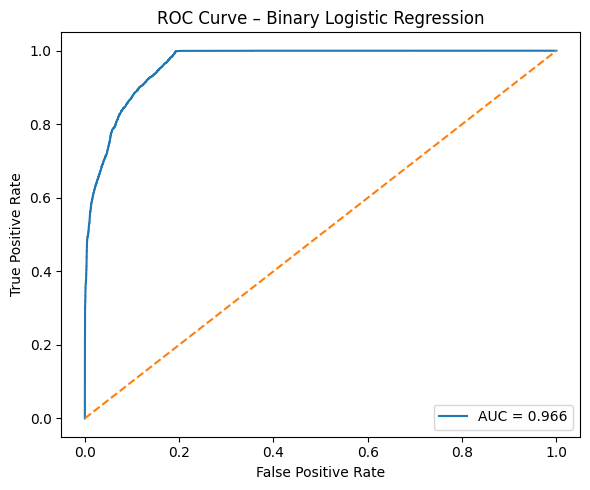

In [ ]:
from sklearn.metrics import roc_curve, auc

y1_label_proba = logmodel_label.predict_proba(X1_test_label_scaled)[:,1]

fpr, tpr, _ = roc_curve(y1_test_label, y1_label_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Binary Logistic Regression')
plt.legend()
plt.tight_layout()

In [ ]:
y1_cat_pred = logmodel_cat.predict(X1_test_cat_scaled)

confusion_matrix(y1_test_cat, y1_cat_pred)

array([[   7,  344,  121,   11,   30,  199,   38],
       [   9, 3011,  528,   12,   89,  211,   64],
       [   9,  137, 2525,   13,  207,  220,  123],
       [   3,   81,   29,  699,    2,   46,   12],
       [   0,  247, 1494,    0, 8592,    5,   57],
       [  12,  132,  235,    1,   13,  396,  102],
       [   4,  304,  379,   11,   23,  204,  556]])

In [ ]:
print(classification_report(y1_test_cat, y1_cat_pred))

              precision    recall  f1-score   support

           0       0.16      0.01      0.02       750
           1       0.71      0.77      0.74      3924
           2       0.48      0.78      0.59      3234
           3       0.94      0.80      0.86       872
           4       0.96      0.83      0.89     10395
           5       0.31      0.44      0.36       891
           6       0.58      0.38      0.46      1481

    accuracy                           0.73     21547
   macro avg       0.59      0.57      0.56     21547
weighted avg       0.76      0.73      0.73     21547



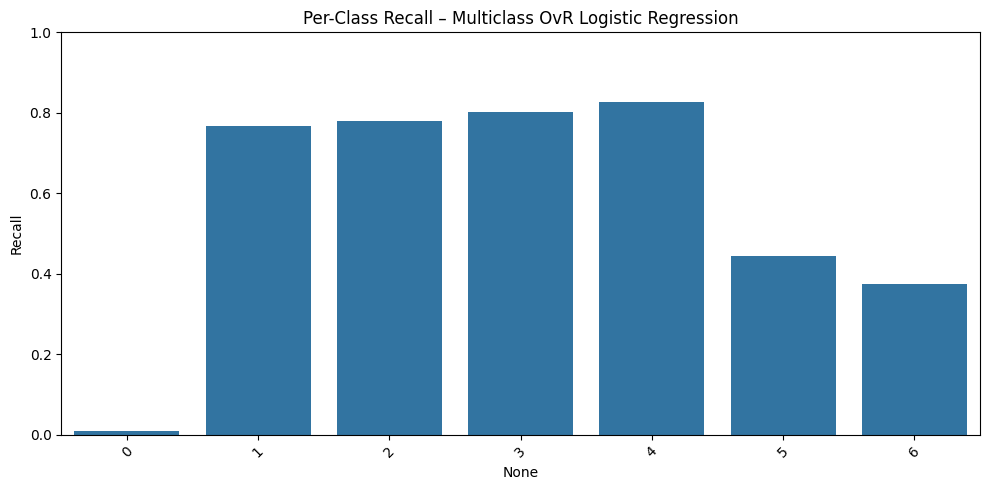

In [ ]:
report = classification_report(
    y1_test_cat,
    y1_cat_pred,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,5))
sns.barplot(
    x=df_report.index[:-3],  # exclude accuracy / avg rows
    y=df_report.loc[df_report.index[:-3], 'recall']
)
plt.xticks(rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall – Multiclass OvR Logistic Regression')
plt.ylim(0,1)
plt.tight_layout()

In [ ]:
new_logmodel_label = LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs')
new_logmodel_label.fit(X1_train_label_scaled, y1_train_label)
new_y1_label_pred = new_logmodel_label.predict(X1_test_label_scaled)

In [ ]:
confusion_matrix(y1_test_label, new_y1_label_pred)

array([[ 8520,  1875],
       [  231, 10921]])

In [ ]:
print(classification_report(y1_test_label, new_y1_label_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     10395
           1       0.85      0.98      0.91     11152

    accuracy                           0.90     21547
   macro avg       0.91      0.90      0.90     21547
weighted avg       0.91      0.90      0.90     21547



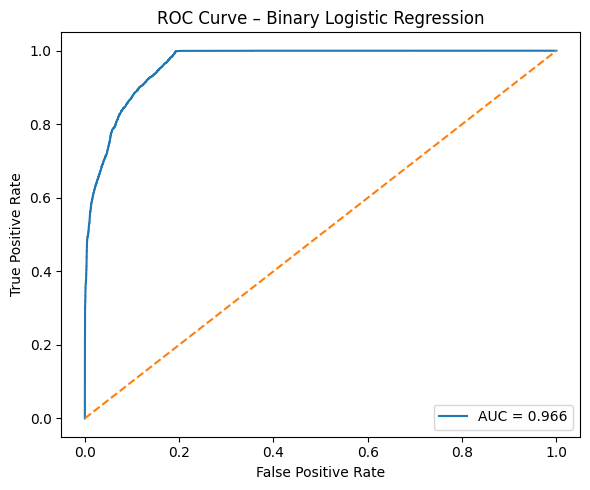

In [ ]:
new_y1_label_proba = logmodel_label.predict_proba(X1_test_label_scaled)[:,1]

fpr, tpr, _ = roc_curve(y1_test_label, new_y1_label_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Binary Logistic Regression')
plt.legend()
plt.tight_layout()

In [ ]:
new_logmodel_cat = LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs')
new_logmodel_cat.fit(X1_train_cat_scaled, y1_train_cat)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
new_y1_cat_pred = new_logmodel_cat.predict(X1_test_cat_scaled)

confusion_matrix(y1_test_cat, y1_cat_pred)

array([[   7,  344,  121,   11,   30,  199,   38],
       [   9, 3011,  528,   12,   89,  211,   64],
       [   9,  137, 2525,   13,  207,  220,  123],
       [   3,   81,   29,  699,    2,   46,   12],
       [   0,  247, 1494,    0, 8592,    5,   57],
       [  12,  132,  235,    1,   13,  396,  102],
       [   4,  304,  379,   11,   23,  204,  556]])

In [ ]:
print(classification_report(y1_test_cat, y1_cat_pred, zero_division=0.0))

              precision    recall  f1-score   support

           0       0.16      0.01      0.02       750
           1       0.71      0.77      0.74      3924
           2       0.48      0.78      0.59      3234
           3       0.94      0.80      0.86       872
           4       0.96      0.83      0.89     10395
           5       0.31      0.44      0.36       891
           6       0.58      0.38      0.46      1481

    accuracy                           0.73     21547
   macro avg       0.59      0.57      0.56     21547
weighted avg       0.76      0.73      0.73     21547



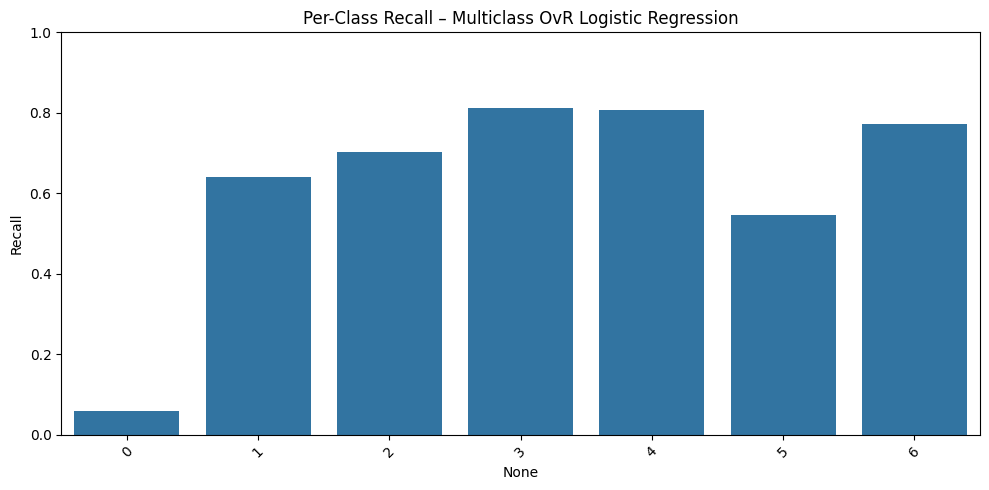

In [ ]:
report = classification_report(
    y1_test_cat,
    new_y1_cat_pred,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,5))
sns.barplot(
    x=df_report.index[:-3],  # exclude accuracy / avg rows
    y=df_report.loc[df_report.index[:-3], 'recall']
)
plt.xticks(rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall – Multiclass OvR Logistic Regression')
plt.ylim(0,1)
plt.tight_layout()

## Testing dataset

In [ ]:
new_logmodel_label.fit(X2_train_label_scaled, y2_train_label)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
new_logmodel_cat.fit(X2_train_cat_scaled, y2_train_cat)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y2_label_pred = new_logmodel_label.predict(X2_test_label_scaled)

confusion_matrix(y2_test_label, y2_label_pred)

array([[5048, 1687],
       [ 492, 3962]])

In [ ]:
print(classification_report(y2_test_label, y2_label_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      6735
           1       0.70      0.89      0.78      4454

    accuracy                           0.81     11189
   macro avg       0.81      0.82      0.80     11189
weighted avg       0.83      0.81      0.81     11189



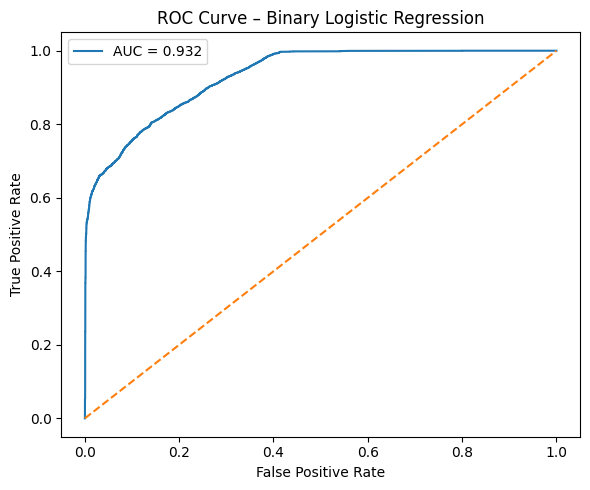

In [ ]:
y2_label_proba = new_logmodel_label.predict_proba(X2_test_label_scaled)[:,1]

fpr, tpr, _ = roc_curve(y2_test_label, y2_label_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Binary Logistic Regression')
plt.legend()
plt.tight_layout()

In [ ]:
y2_cat_pred = new_logmodel_cat.predict(X2_test_cat_scaled)

confusion_matrix(y2_test_cat, y2_cat_pred)

array([[  43,  142,   34,    5,    3,   97,   32],
       [  92,  960,  130,   13,   30,  100,  249],
       [  15,   20,  695,    3,    8,   93,  143],
       [  13,   65,   34,  618,    2,    6,   14],
       [  52,  299, 1489,    5, 4034,   35,  821],
       [  33,    6,   18,    1,    9,  120,   66],
       [  13,    0,   43,    1,    1,   37,  447]])

In [ ]:
print(classification_report(y2_test_cat, y2_cat_pred, zero_division=0.0))

              precision    recall  f1-score   support

           0       0.16      0.12      0.14       356
           1       0.64      0.61      0.63      1574
           2       0.28      0.71      0.41       977
           3       0.96      0.82      0.88       752
           4       0.99      0.60      0.75      6735
           5       0.25      0.47      0.32       253
           6       0.25      0.82      0.39       542

    accuracy                           0.62     11189
   macro avg       0.50      0.59      0.50     11189
weighted avg       0.80      0.62      0.66     11189



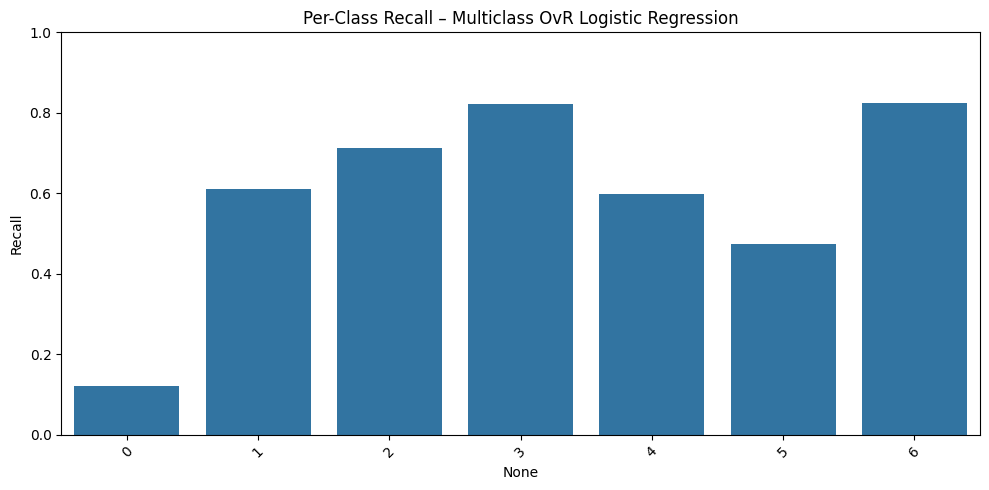

In [ ]:
report = classification_report(
    y2_test_cat,
    y2_cat_pred,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,5))
sns.barplot(
    x=df_report.index[:-3],  # exclude accuracy / avg rows
    y=df_report.loc[df_report.index[:-3], 'recall']
)
plt.xticks(rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall – Multiclass OvR Logistic Regression')
plt.ylim(0,1)
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X1_train_cat_scaled, y1_train_cat)

y1_cat_pred = rf.predict(X1_test_cat_scaled)
confusion_matrix(y1_test_cat, y1_cat_pred)

array([[ 112,  332,   61,    3,   23,  175,   44],
       [  65, 3316,  155,    8,   81,  179,  120],
       [  33,   73, 2274,    7,  607,  196,   44],
       [  16,   84,   12,  708,    4,   44,    4],
       [   1,   68,  796,    0, 9504,   13,   13],
       [  92,  170,  139,   24,   73,  300,   93],
       [  38,  205,   28,    1,    5,  152, 1052]])

In [ ]:
print(classification_report(y1_test_cat, y1_cat_pred))

              precision    recall  f1-score   support

           0       0.31      0.15      0.20       750
           1       0.78      0.85      0.81      3924
           2       0.66      0.70      0.68      3234
           3       0.94      0.81      0.87       872
           4       0.92      0.91      0.92     10395
           5       0.28      0.34      0.31       891
           6       0.77      0.71      0.74      1481

    accuracy                           0.80     21547
   macro avg       0.67      0.64      0.65     21547
weighted avg       0.80      0.80      0.80     21547



## Hyperparameter Tuning with GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]       # Minimum number of samples required to be at a leaf node
}

# Initialize the search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit GridSearchCV to the training data for attack_cat prediction
print("Starting GridSearchCV...")
grid_search.fit(X1_train_cat_scaled, y1_train_cat)
print("GridSearchCV completed.")

Starting GridSearchCV...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
GridSearchCV completed.


### Best Hyperparameters and Score

In [ ]:
print(f"Best parameters found: {grid_search.best_params_}")

print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_rf_model = grid_search.best_estimator_

y1_cat_pred_tuned = best_rf_model.predict(X1_test_cat_scaled)

print("\nConfusion Matrix for Tuned Model:")
display(confusion_matrix(y1_test_cat, y1_cat_pred_tuned))

print("\nClassification Report for Tuned Model:")
print(classification_report(y1_test_cat, y1_cat_pred_tuned, zero_division=0.0))

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.8054

Confusion Matrix for Tuned Model:


array([[  92,  333,   59,    0,   20,  224,   22],
       [  19, 3332,  188,    0,   74,  229,   82],
       [   9,   51, 2354,    0,  506,  261,   53],
       [   8,   89,   22,  697,    1,   53,    2],
       [   0,   66,  832,    0, 9453,   11,   33],
       [   5,   99,  149,    0,   68,  512,   58],
       [  10,  195,   24,    0,    3,  206, 1043]])


Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.64      0.12      0.21       750
           1       0.80      0.85      0.82      3924
           2       0.65      0.73      0.69      3234
           3       1.00      0.80      0.89       872
           4       0.93      0.91      0.92     10395
           5       0.34      0.57      0.43       891
           6       0.81      0.70      0.75      1481

    accuracy                           0.81     21547
   macro avg       0.74      0.67      0.67     21547
weighted avg       0.83      0.81      0.81     21547

